%%latex
\tableofcontents

# Preparations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
# ENV_NAME = 'colab'
ENV_NAME = 'local'
path_prefix = {'colab': '/content/drive/MyDrive/ComputerVision/CV-Phase1/', 
                'local': './Images/'}

Open image using pyplot:

In [4]:
def loadImage(name, path_prefix=path_prefix[ENV_NAME]):
  image = plt.imread(path_prefix + name)
  print(image.shape)
  print(type(image))
  return image

(512, 512, 3)
<class 'numpy.ndarray'>
(568, 797, 3)
<class 'numpy.ndarray'>
(600, 800, 3)
<class 'numpy.ndarray'>
(599, 799, 3)
<class 'numpy.ndarray'>


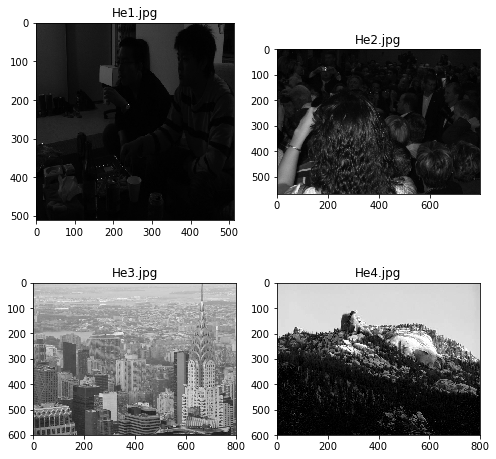

In [5]:
he1 = loadImage('he1.jpg')
he2 = loadImage('he2.jpg')
he3 = loadImage('he3.jpg')
he4 = loadImage('he4.jpg')
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i, img in enumerate([he1, he2, he3, he4]):
  ax[i//2, i%2].imshow(img)
  ax[i//2, i%2].set_title('He{}.jpg'.format(i+1))
plt.show()

All these images ar black and white, so it's best we do the following changes on their greyscale versions.

In [6]:
def rgb2grey(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

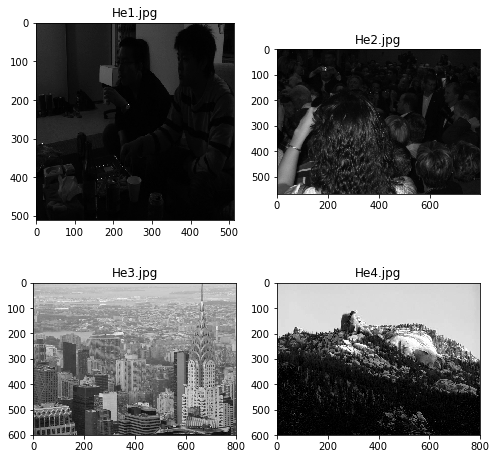

In [7]:
he1 = rgb2grey(he1)
he2 = rgb2grey(he2)
he3 = rgb2grey(he3)
he4 = rgb2grey(he4)
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
for i, img in enumerate([he1, he2, he3, he4]):
    ax[i//2, i%2].imshow(img, cmap='gray')
    ax[i//2, i%2].set_title('He{}.jpg'.format(i+1))
plt.show()

# Histogram Equalization

We begin by plotting the histogram of `He1.jpg` using pyplot's built-in histogram plotting function.

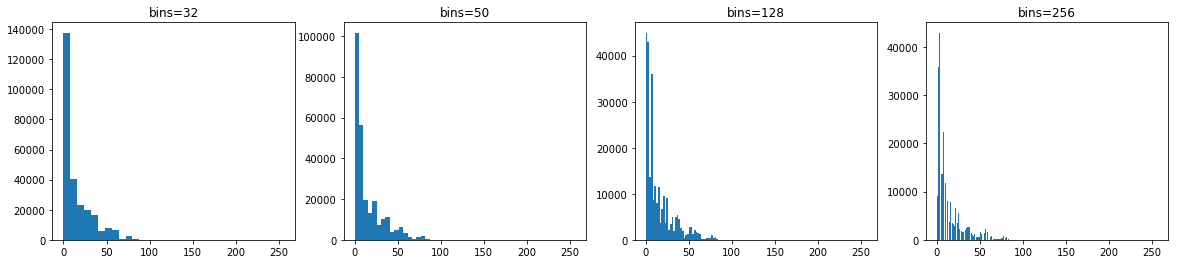

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
flat = (he1.flatten()).astype(np.uint8)
for i, b in enumerate([32, 50, 128, 256]):
    axs[i%4].hist(flat, bins=b, range=(0, 256))
    axs[i%4].set_title('bins={}'.format(b))
plt.show()

This is a good way to see the distribution of the image, however, we can define our own histogram functions.

In [8]:
def chunks(lst, n):
    step = len(lst)//n
    for i in range(0, len(lst), step):
        yield lst[i:i + step]

def get_hist(img, bn=256):
    bins = list(chunks(range(0,256), bn))
    bins = np.array([sum(x)/len(x) for x in bins])
    hist = np.zeros(bn+1)
    for px in img:
        hist[np.digitize(px, bins)] += 1
    return hist

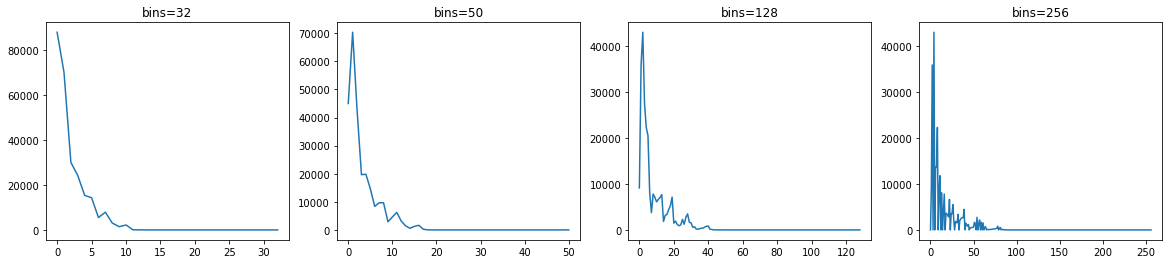

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
flat = (he1.flatten()).astype(np.uint8)
for i, b in enumerate([32, 50, 128, 256]):
    hist = get_hist(flat, b)
    axs[i%4].plot(hist)
    axs[i%4].set_title('bins={}'.format(b))
plt.show()

Function `cumulative_sum()` is a helper function that calculates the cumulative sum of the histogram. Note that this sum is not normalised.

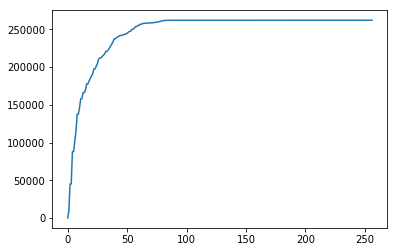

In [10]:
flat = (he1.flatten()).astype(np.uint8)
hist = get_hist(flat, 256)
def cumulative_sum(arr):
    arr = iter(arr)
    s = [next(arr)]
    for i in arr:
        s.append(s[-1] + i)
    return np.array(s)

cs = cumulative_sum(hist)
plt.plot(cs)

The image's accumulated *normalised* histogram is found as follows:
$${cdf_x(i) = \sum^i_{j=0}{\dfrac{n_j}{N}}}$$
We can normalise the sum to be between 0 and 255.

In [11]:
def normalise(cs):
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()
    cdf = nj / N
    cdf = cdf.astype('uint8')
    return cdf

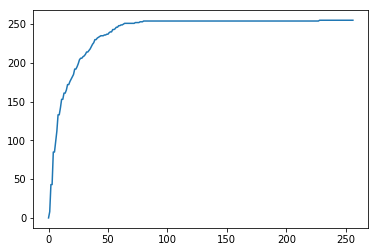

In [34]:
cdf = normalise(cs)
plt.plot(cdf)

Using the cumulative sum, we can create a new, equalised histogram.

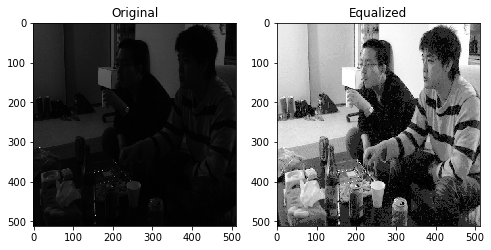

In [36]:
eq_he1 = cdf[flat]
eq_he1 = eq_he1.reshape(he1.shape)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(he1, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(eq_he1, cmap='gray')
ax[1].set_title('Equalized')
plt.show()

And their histograms:

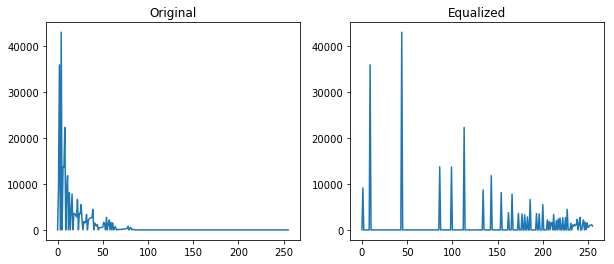

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
og_hist = get_hist(flat, 256)
eq_hist = get_hist(eq_he1.flatten().astype(np.uint8), 256)
axs[0].plot(og_hist)
axs[0].set_title('Original')
axs[1].plot(eq_hist)
axs[1].set_title('Equalized')
plt.show()

The equalisation is more visible in log scale:

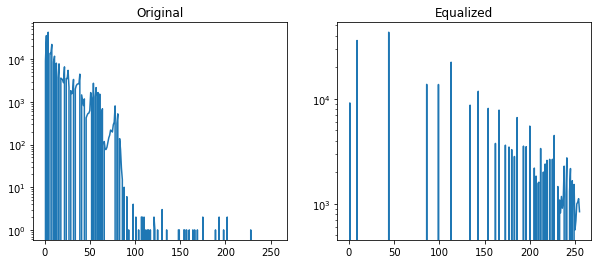

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(og_hist)
axs[0].set_title('Original')
axs[0].set_yscale('log')
axs[1].plot(eq_hist)
axs[1].set_yscale('log')
axs[1].set_title('Equalized')
plt.show()

Now we can repeat the process for the other images.

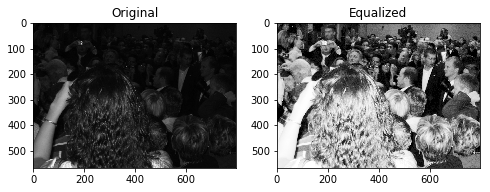

In [16]:
flat = (he2.flatten()).astype(np.uint8)
hist = get_hist(flat, 256)
cs = cumulative_sum(hist)
cdf = normalise(cs)
eq_he2 = cdf[flat]
eq_he2 = eq_he2.reshape(he2.shape)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(he2, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(eq_he2, cmap='gray')
ax[1].set_title('Equalized')
plt.show()

And their histograms:

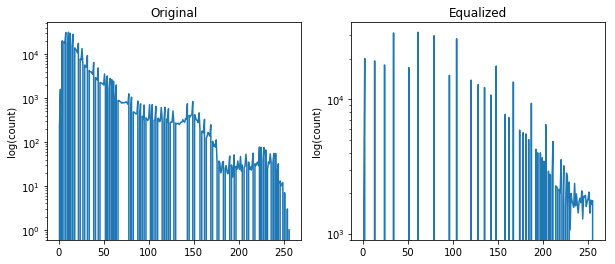

In [171]:
eq_hist = get_hist(eq_he2.flatten().astype(np.uint8), 256)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(hist)
axs[0].set_title('Original')
axs[0].set_yscale('log')
axs[0].set_ylabel('log(count)')

axs[1].plot(eq_hist)
axs[1].set_yscale('log')
axs[1].set_ylabel('log(count)')
axs[1].set_title('Equalized')
plt.show()

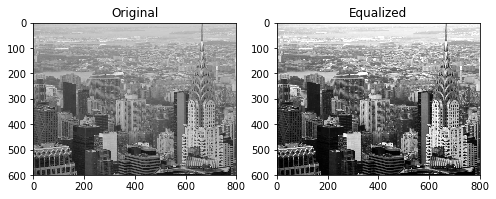

In [18]:
flat = (he3.flatten()).astype(np.uint8)
hist = get_hist(flat, 256)
cs = cumulative_sum(hist)
cdf = normalise(cs)
eq_he3 = cdf[flat]
eq_he3 = eq_he3.reshape(he3.shape)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(he3, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(eq_he3, cmap='gray')
ax[1].set_title('Equalized')
plt.show()

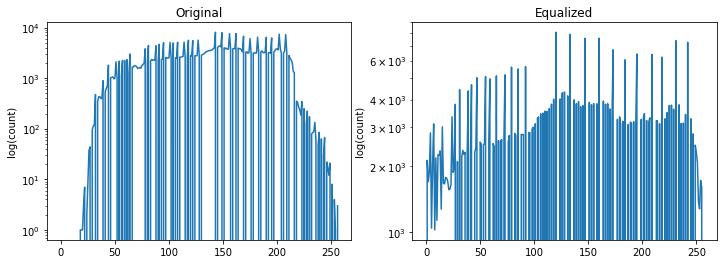

In [19]:
eq_hist = get_hist(eq_he3.flatten().astype(np.uint8), 256)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist)
axs[0].set_title('Original')
axs[0].set_yscale('log')
axs[0].set_ylabel('log(count)')

axs[1].plot(eq_hist)
axs[1].set_yscale('log')
axs[1].set_ylabel('log(count)')
axs[1].set_title('Equalized')
plt.show()

The last image preforms poorly after equalisation.

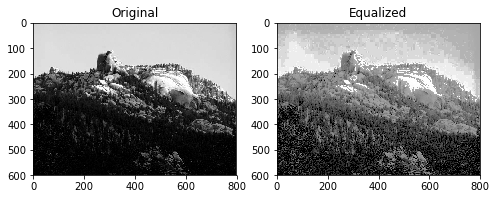

In [42]:
flat = (he4.flatten()).astype(np.uint8)
hist = get_hist(flat, 256)
cs = cumulative_sum(hist)
cdf = normalise(cs)
eq_he4 = cdf[flat]
eq_he4 = eq_he4.reshape(he4.shape)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(he4, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(eq_he4, cmap='gray')
ax[1].set_title('Equalized')
plt.show()

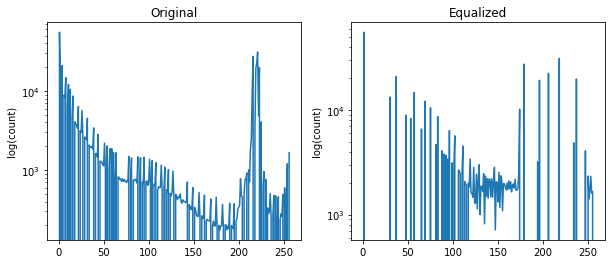

In [175]:
eq_hist = get_hist(eq_he4.flatten().astype(np.uint8), 256)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(hist)
axs[0].set_title('Original')
axs[0].set_yscale('log')
axs[0].set_ylabel('log(count)')

axs[1].plot(eq_hist)
axs[1].set_yscale('log')
axs[1].set_ylabel('log(count)')
axs[1].set_title('Equalized')
plt.show()

## Histogram Equalisation Blending
Given image $f$ and its equalised version $f_{HE}$ we can blend the two images using the following formula:
$$g = \alpha f + (1-\alpha) f_{HE}$$
where $\alpha$ is a blending factor.
Using this, we observe the results for different blending factors in range [0.1,0.5]

In [176]:
def blend_eq(img, img_he, alpha):
    blend = np.zeros(img.shape, dtype=np.uint8)
    blend = img * alpha + img_he * (1 - alpha)
    return blend

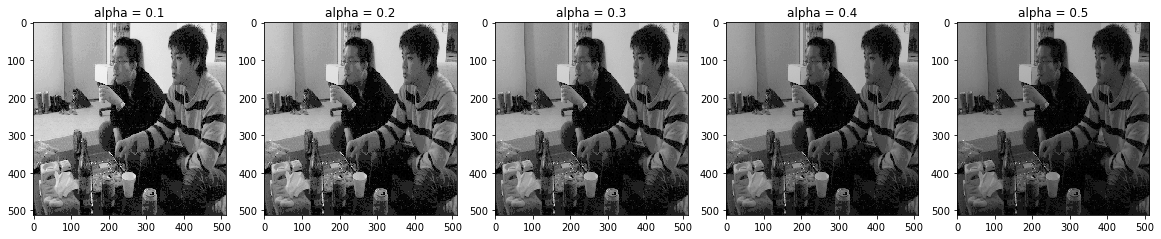

In [179]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
for i, a in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    blend = blend_eq(he1, eq_he1, a)
    axs[i].imshow(blend, cmap='gray')
    axs[i].set_title('alpha = {}'.format(a))
plt.show()

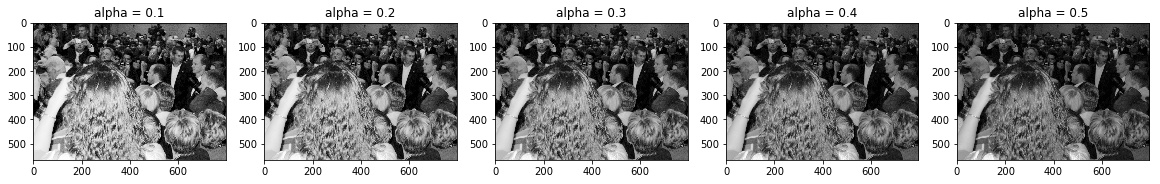

In [180]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
for i, a in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    blend = blend_eq(he2, eq_he2, a)
    axs[i].imshow(blend, cmap='gray')
    axs[i].set_title('alpha = {}'.format(a))
plt.show()

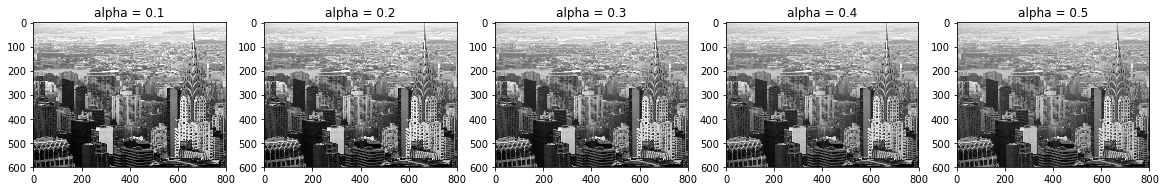

In [181]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
for i, a in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    blend = blend_eq(he3, eq_he3, a)
    axs[i].imshow(blend, cmap='gray')
    axs[i].set_title('alpha = {}'.format(a))
plt.show()

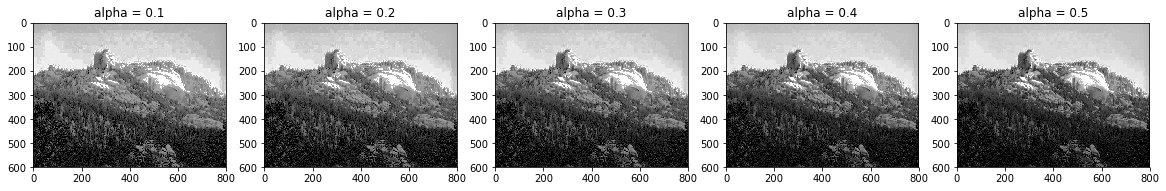

In [182]:
fig, axs = plt.subplots(1,5, figsize=(20,4))
for i, a in enumerate([0.1, 0.2, 0.3, 0.4, 0.5]):
    blend = blend_eq(he4, eq_he4, a)
    axs[i].imshow(blend, cmap='gray')
    axs[i].set_title('alpha = {}'.format(a))
plt.show()

# Local Histogram Equalisation
LHE is a local version of HE, where the histogram is only calculated for a small region of the image. This is done by using a sliding window and calculating the histogram for each window.

We start by `he4.jpg` but we first have to resize the image as the classical approach is too slow for the large image. For this purpose, resize function from cv2 is used.

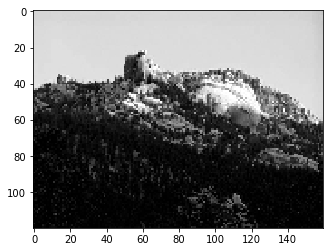

In [47]:
import cv2
he4_res = cv2.resize(he4, (0,0), fx=0.2, fy=0.2)
plt.imshow(he4_res, cmap='gray')

Then we pad the image so the sliding window can work on all the image, and we create a mask to indicate the area of the image that we want to calculate the histogram. Each iteration preforms a full HE on the window locally, then proceed to the next window.

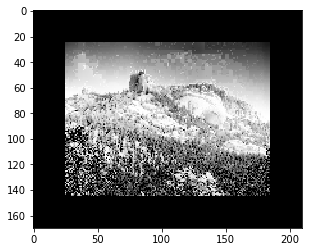

In [44]:
window_size = 51
he4_pad = np.pad(he4_res, window_size//2, 'constant', constant_values=0)
he4_lhe = np.copy(he4_pad)
for x in range(window_size//2, he4_res.shape[0]):
    for y in range(window_size//2, he4_res.shape[1]):
        flat = (he4_pad[x - window_size//2 : x + window_size//2 + 1, y - window_size//2 : y + window_size//2 + 1].flatten()).astype(np.uint8)
        hist = get_hist(flat, 256)
        cs = cumulative_sum(hist)
        cdf = normalise(cs)
        window_eq = cdf[flat]
        he4_lhe[x - window_size//2 : x + window_size//2 + 1, y - window_size//2 : y + window_size//2 + 1] = window_eq.reshape(he4_lhe[x - window_size//2 : x + window_size//2 + 1, y - window_size//2 : y + window_size//2 + 1] .shape)
plt.imshow(he4_lhe, cmap='gray')

Now we attempt the same thing for other window sizes.

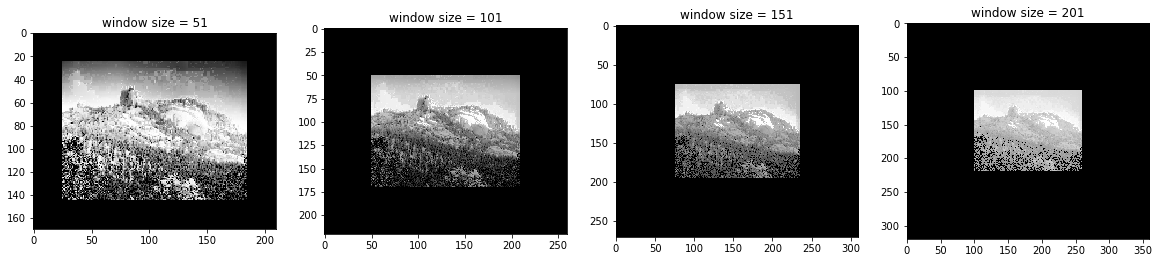

In [48]:
window_sizes = [51, 101, 151, 201]
fig, axs = plt.subplots(1,4, figsize=(20,4))
for i, w in enumerate(window_sizes):
    he4_pad = np.pad(he4_res, w//2, 'constant', constant_values=0)
    he4_lhe = np.copy(he4_pad)
    for x in range(w//2, he4_res.shape[0] + w//2):
        for y in range(w//2, he4_res.shape[1] + w//2):
            flat = (he4_pad[x - w//2 : x + w//2, y - w//2 : y + w//2].flatten()).astype(np.uint8)
            hist = get_hist(flat, 256)
            cs = cumulative_sum(hist)
            cdf = normalise(cs)
            window_eq = cdf[flat]
            he4_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2] = window_eq.reshape(he4_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2] .shape)
    axs[i].imshow(he4_lhe, cmap='gray')
    axs[i].set_title('window size = {}'.format(w))
plt.imshow(he4_lhe, cmap='gray')

Larger window sizes cause the calculation to approximate the global HE, while smaller window sizes preform more locally and are generally faster too.
We will repeat the process for the other images.
Dropping the padding helps remove the effect of false data (all zeros at borders) that can be caused by the padding.

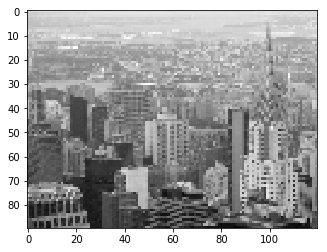

In [58]:
import cv2
he3_res = cv2.resize(he3, (0,0), fx=0.15, fy=0.15)
plt.imshow(he3_res, cmap='gray')

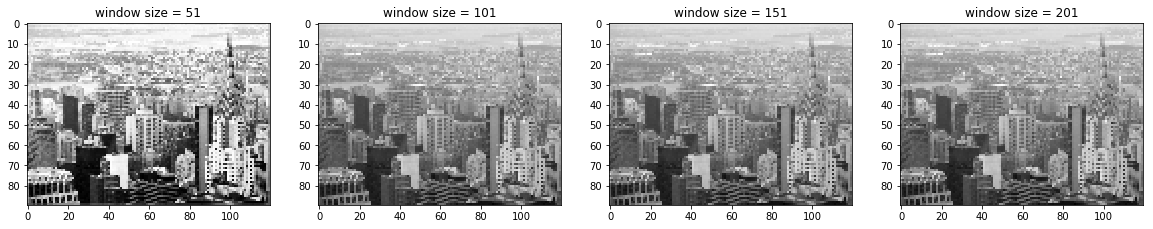

In [60]:
window_sizes = [51, 101, 151, 201]
fig, axs = plt.subplots(1,4, figsize=(20,4))
for i, w in enumerate(window_sizes):
    # no more padding!
    he3_lhe = np.copy(he3_res)
    for x in range(w//2, he3_res.shape[0] - w//2):
        for y in range(w//2, he3_res.shape[1] - w//2):
            flat = (he3_res[x - w//2 : x + w//2, y - w//2 : y + w//2].flatten()).astype(np.uint8)
            hist = get_hist(flat, 256)
            cs = cumulative_sum(hist)
            cdf = normalise(cs)
            window_eq = cdf[flat]
            he3_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2] = window_eq.reshape(he3_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2] .shape)
    axs[i].imshow(he3_lhe, cmap='gray')
    axs[i].set_title('window size = {}'.format(w))
plt.imshow(he3_lhe, cmap='gray')

Again, as seen above, for window sizes > 100, the local HE essentially becomes global, and the results is the same for all subsequent windows.

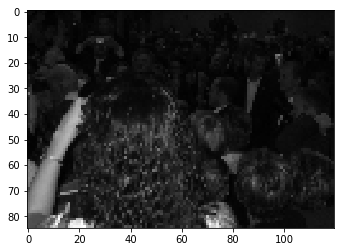

In [68]:
he2_res = cv2.resize(he2, (0,0), fx=0.15, fy=0.15)
plt.imshow(he2_res, cmap='gray')

66.54200601577759


KeyboardInterrupt: 

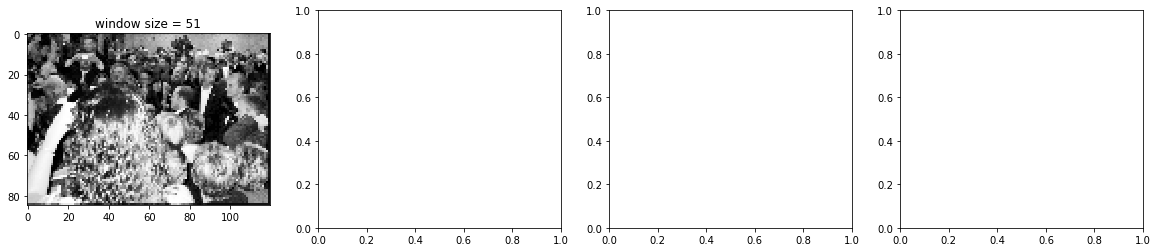

In [69]:
import time
window_sizes = [51, 101, 151, 201]
fig, axs = plt.subplots(1,4, figsize=(20,4))
for i, w in enumerate(window_sizes):
    if w > he2_res.shape[0] or w > he2_res.shape[1]:
        he2_pad = np.pad(he2_res, (w//2, w//2), 'constant', constant_values=0)
    else:
        he2_pad = np.pad(he2_res, (0,0), 'constant', constant_values=0)
    he2_lhe = np.copy(he2_pad)
    t0 = time.time()
    for x in range(w//2, he2_pad.shape[0] - w//2):
        for y in range(w//2, he2_pad.shape[1] - w//2):
            flat = (he2_pad[x - w//2 : x + w//2, y - w//2 : y + w//2].flatten()).astype(np.uint8)
            hist = get_hist(flat, 256)
            cs = cumulative_sum(hist)
            cdf = normalise(cs)
            window_eq = cdf[flat]
            # un-flatten
            he2_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2] = window_eq.reshape(he2_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2].shape)
    print(time.time() - t0)
    axs[i].imshow(he2_lhe, cmap='gray')
    axs[i].set_title('window size = {}'.format(w))
plt.imshow(he3_lhe, cmap='gray')

## Optimisation
LHE in its classic implementation is very slow, since it essentially calculates the histogram for each pixel over a large window. To speed up the process, we can take larger steps in sliding windows, and calculate the middle points using interpolation.
For better results, we need even-sized windows, i.e. 50×50, 100×100, etc.

In [12]:
import cv2
he3_res = cv2.resize(he3, (0,0), fx=1, fy=1)

In [13]:
def fast_lhe(img, w):
    cdfs = {}
    # padding that doesn't generate false data
    img_pad = np.pad(img, w//2, 'reflect')
    for x in range(w//2, img_pad.shape[0] - w//2 + 1, w//2):
        for y in range(w//2, img_pad.shape[1] - w//2 + 1, w//2):
            flat = (img_pad[x - w//2 : x + w//2, y - w//2 : y + w//2].flatten()).astype(np.uint8)
            hist = get_hist(flat, 256)
            cs = cumulative_sum(hist)
            cdf = normalise(cs)
            window_eq = cdf[flat]
            cdfs[(x,y)] = cdf[flat].reshape(img_pad[x - w//2 : x + w//2, y - w//2 : y + w//2].shape)
            # img_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2] = window_eq.reshape(img_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2].shape)
    return cdfs

In [14]:
def interp_lhe(img, cdfs, w):
    img_pad = np.pad(img, w//2, 'reflect')
    img_lhe = np.zeros(img_pad.shape)
    print(img_pad.shape)
    # preform interpolation on the image,
    # use nearest neighbor for borders and bilinear for the rest
    for x in range(w//2, img_pad.shape[0] - w//2 + 1):
        for y in range(w//2, img_pad.shape[1] - w//2 + 1):
            # find closest centres
            x_lower = int(x // (w/2) * w/2)
            x_upper = int(x_lower + w/2)
            y_lower = int(y // (w/2) * w/2)
            y_upper = int(y_lower + w/2)
            if (abs(x-x_lower) < abs(x-x_upper)) or x_upper > img_pad.shape[0] - w//2:
                xnn = x_lower
            else:
                xnn = x_upper
            if (abs(y-y_lower) < abs(y-y_upper)) or y_upper > img_pad.shape[1] - w//2:
                ynn = y_lower
            else:
                ynn = y_upper
            ox = int(((xnn // (w/2)) - 1) * w/2)
            oy = int(((ynn // (w/2)) - 1) * w/2)

            # print(xnn, ynn, ox, oy)
            pixel = cdfs[(xnn, ynn)][min(x, int(x - ox)), min(y, int(y - oy))]
            img_lhe[x,y] = pixel.reshape(img_lhe[x,y].shape)
    return img_lhe

In [18]:
cdfs = fast_lhe(he4, 100)

In [19]:
he3_lhe = interp_lhe(he4, cdfs, 100)

(649, 849)


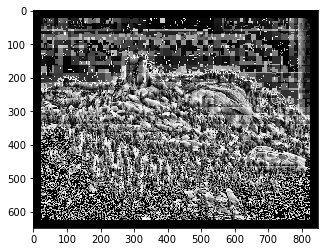

In [20]:
plt.imshow(he3_lhe, cmap='gray')

In [27]:
plt.imshow(he3_lhe, cmap='gray')

dict_keys([(25, 25), (25, 50), (25, 75), (25, 100), (25, 125), (25, 150), (25, 175), (25, 200), (25, 225), (25, 250), (25, 275), (25, 300), (25, 325), (25, 350), (25, 375), (25, 400), (25, 425), (25, 450), (25, 475), (25, 500), (25, 525), (25, 550), (25, 575), (25, 600), (25, 625), (25, 650), (25, 675), (25, 700), (25, 725), (25, 750), (25, 775), (25, 800), (50, 25), (50, 50), (50, 75), (50, 100), (50, 125), (50, 150), (50, 175), (50, 200), (50, 225), (50, 250), (50, 275), (50, 300), (50, 325), (50, 350), (50, 375), (50, 400), (50, 425), (50, 450), (50, 475), (50, 500), (50, 525), (50, 550), (50, 575), (50, 600), (50, 625), (50, 650), (50, 675), (50, 700), (50, 725), (50, 750), (50, 775), (50, 800), (75, 25), (75, 50), (75, 75), (75, 100), (75, 125), (75, 150), (75, 175), (75, 200), (75, 225), (75, 250), (75, 275), (75, 300), (75, 325), (75, 350), (75, 375), (75, 400), (75, 425), (75, 450), (75, 475), (75, 500), (75, 525), (75, 550), (75, 575), (75, 600), (75, 625), (75, 650), (75, 675

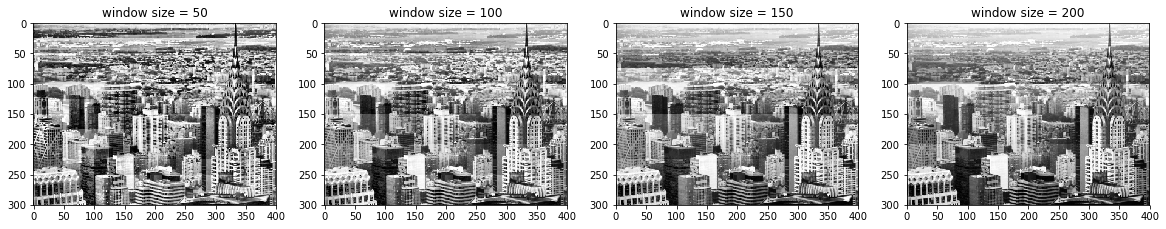

In [173]:
window_sizes = [50, 100, 150, 200]
# window_sizes = [50]
fig, axs = plt.subplots(1,4, figsize=(20,4))
for i, w in enumerate(window_sizes):
    # he3_pad = np.pad(he3_res, w//2, 'constant', constant_values=0)
    counter = np.zeros(he3_res.shape)
    he3_lhe = np.zeros(he3_res.shape)
    for x in range(w//2, he3_res.shape[0] + w//2, w//2):
        for y in range(w//2, he3_res.shape[1] + w//2, w//2):
            flat = (he3_res[x - w//2 : x + w//2, y - w//2 : y + w//2].flatten()).astype(np.uint8)
            hist = get_hist(flat, 256)
            cs = cumulative_sum(hist)
            cdf = normalise(cs)
            window_eq = cdf[flat]
            counter[x - w//2 : x + w//2, y - w//2 : y + w//2] += 1
            he3_lhe[x - w//2 : x + w//2, y - w//2 : y + w//2] = (window_eq.reshape(he3_res[x - w//2 : x + w//2, y - w//2 : y + w//2].shape))
    he3_lhe = he3_lhe / counter
    axs[i].imshow(he3_lhe, cmap='gray')
    axs[i].set_title('window size = {}'.format(w))
plt.show()

This approach doesn't use interpolation, and the window edges are visible, creating a tiling effect.

In [122]:
def interpolate(img, window_size):
    new_img = np.copy(img)
    for x in range(0, new_img.shape[0]):
        for y in range(0, new_img.shape[1]):
            
            if x_low < 0 or x_high >= new_img.shape[0] or y_low < 0 or y_high >= new_img.shape[1]:
                continue
            new_img[x,y] = 0
    return new_img

In [123]:
he3_interp = interpolate(he3_lhe, window_size=200)

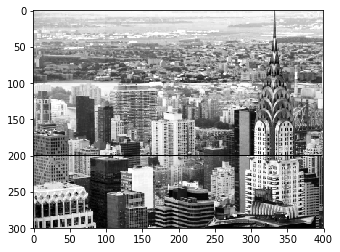

In [124]:
plt.imshow(he3_interp, cmap='gray')